# Manipulación de Arrays con Numpy

### Arrays en Numpy

A diferencia de las listas de Python, cuando creamos un array en Numpy, existe la restricción de que todos los elementos tienen que ser del mismo tipo.
Esto hace que los arrays de numpy sean **más eficientes**.


In [1]:
import numpy as np

In [2]:
# integer array:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

In [4]:
# Si la lista de python tiene integers y floats, el array de Numpy transforma todo en float para tener un solo tipo.
py_list = [3.14, 4, 2, 3]

np.array(py_list)

array([ 3.14,  4.  ,  2.  ,  3.  ])



Para crear arrays desde cero, lo más eficiente es hacerlo con los métodos propios de Numpy. Puedo crear arrays de ceros, de unos, de una secuencia, de valores aleatorios o de valores con una cierta **distribución estadística**, como por ejemplo la distribución normal.

##### Crear una Array de ceros

In [5]:
# Crear un array de longitud 10 lleno con ceros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Inicializar un array vacío

In [19]:
# Devuelve valores aleatorios. Inicializa un array del tamaño indicado.
np.empty([2, 2]) 

array([[ 3.14,  4.  ],
       [ 2.  ,  3.  ]])

#### Crear un Array que contiene números con distribución normal

In [7]:
# Crea un array de 3x4 con números normalmente distribuidos.
np.random.normal(0, 1, (3, 4))

array([[ 0.1363984 , -0.14012713,  1.92429705, -0.08838869],
       [ 0.79689676,  0.63484155, -1.21470382,  0.88642921],
       [-0.87568149, -0.08390638, -0.10316375, -0.84956543]])


### Atributos de un array


In [8]:
# Opcionalmente, puedo utilizar set seed para que la función random de siempre los mismos resultados
np.random.seed(0)  

# Array de 3 dimensiones
x3 = np.random.randint(10, size=(3, 4, 5))  

In [9]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("dtype:", x3.dtype)
print("itemsize:", x3.itemsize, "bytes") # Es el tamaño de cada elemento del array. Depende del tipo de datos. 
print("nbytes:", x3.nbytes, "bytes") # Es el tamaño de todo el array. Se calcula itemsize * size

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype: int64
itemsize: 8 bytes
nbytes: 480 bytes



### Array slicing (Selección de elementos)

El slicing es similar al de las listas de python (start,stop,step)


In [10]:
# Sobre un array de una dimension
one_d_array = np.arange(10)
one_d_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
# Uno sí, uno no, empezando desde 1 (el segundo elemento)
one_d_array[1::2]  

array([1, 3, 5, 7, 9])

Con la misma lógica, se puede seleccionar en dos dimensiones

In [14]:
np.random.seed(0)
two_d_array = np.random.randint(10, size=(3, 4))
two_d_array

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [26]:
# Esta forma de seleccionar cambia el orden de las columnas 
two_d_array[:, ::-1]

array([[3, 3, 0, 5],
       [5, 3, 9, 7],
       [6, 7, 4, 2]])

In [27]:
# Acceder a una columna
two_d_array[:, 0]

array([5, 7, 2])

In [28]:
# Acceder a una fila
two_d_array[2, :]

array([2, 4, 7, 6])

In [29]:
# Otra forma de acceder a una fila
two_d_array[2]

array([2, 4, 7, 6])

### Reshaping de arrays (Cambiar la dimensionalidad)

In [30]:
grid = np.arange(1, 10).reshape((3, 3))
grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Concatenar y separar Arrays 


In [31]:
# Concatenate une los elementos de los dos arrays en uno nuevo.

x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [32]:
grid1 = np.array([[1, 2, 3],
                 [4, 5, 6]])

grid2 = np.array([[10,11],
                 [12,13]])

In [33]:
# Cuando el array es de dos dimensiones también podemos concatenar fila a fila con axis = 1
np.concatenate([grid1, grid2], axis=1)

array([[ 1,  2,  3, 10, 11],
       [ 4,  5,  6, 12, 13]])

In [34]:
# El método np.split() toma una lista con los índices donde se establecen los cortes.
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


## Numpy Universal Functions

La ventaja de usar Numpy sobre Python nativo es que permite aplicar **operaciones vectorizadas**. 

Cuando determinadas operaciones se aplican sobre todos los elementos de un array, esta tarea se puede paralelizar y la computadora la completa en un tiempo mucho menor que si aplicásemos un loop y operásemos sobre cada uno de los elementos.

Para esto sirven las UFuncs (Universal Functions) de Numpy


#### Ejemplo: calcular el recíproco (1/x) de cada elemento de un array

In [18]:
# Enfoque tradicional

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1 loop, best of 3: 1.82 s per loop


In [19]:
# Enfoque Numpy

%timeit (1.0 / big_array)

100 loops, best of 3: 2.45 ms per loop


## Agregación, Max y Min con Numpy

Con numpy se pueden hacer de forma más eficiente los métodos que trabajan sobre los elementos del array:

In [ ]:
big_array = np.random.rand(100000)
%timeit sum(big_array)
%timeit np.sum(big_array)


#### En arrays de varias dimensiones

In [27]:
M = np.random.random((3, 4))
print(M)

[[ 0.27761346  0.19348369  0.2724637   0.69665051]
 [ 0.0653163   0.33842354  0.32667899  0.74672223]
 [ 0.53820839  0.94378222  0.98040011  0.14521389]]


In [14]:
# En Numpy, axis = 0 está indicando columnas y axis = 1 indica filas.
# En otras librerías de Python se indexa distinto.
print(M.sum())
print(M.min(axis=0))
print(M.max(axis=1))

NameError: name 'M' is not defined

#### Ejemplo de aplicación

In [29]:
# En este punto usamos la librería pandas únicamente para importar un csv 
import pandas as pd
data = pd.read_csv('data/president_heights.csv')

# En este punto estamos indexando un dataframe para extraer una columna.
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [30]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))


25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


In [31]:
# Importamos las librerías de visualización
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

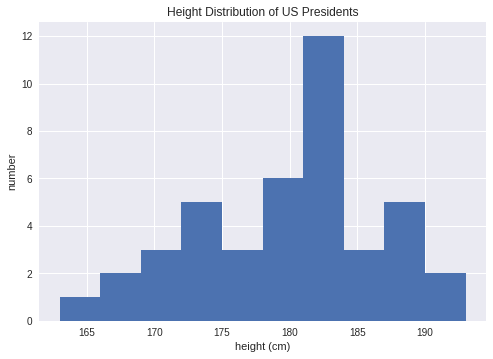

In [32]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')
plt.show()

## Broadcasting: Otra forma de vectorizar

En conjunto con las ufuncs, el broadcasting es una forma de aplicar operaciones sobre los datos sin tener que escribir loops "for" en Python nativo que resultan más lentos.

** Poner el gráfico de bdct en el slide


In [33]:
a = np.array([[[0, 1, 2]]])
b = np.array([5, 5, 5])
c = np.ones((2,3))
c

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [34]:
# A la matriz de unos se le suma el array "a" en cada una de sus filas.
a + c

array([[[ 1.,  2.,  3.],
        [ 1.,  2.,  3.]]])

## Comparaciones y Máscaras Booleanas

**Agregar la tabla con los operadores.**


In [6]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
rainfall.shape

(365,)

In [13]:
# Cuando aplicamos una condición booleana sobre un Array de numpy, 
# Numpy devuelve una nuevo array con True o False.

rainfall == 0

array([ True, False, False,  True,  True, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False,  True, False, False, False, False,  True, False, False,
        True,  True,  True,  True,  True, False, False, False,  True,
        True, False,

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

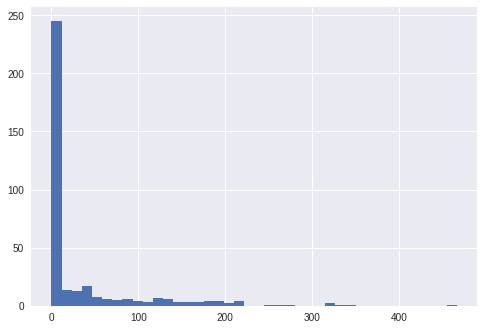

In [37]:
plt.hist(rainfall,bins = 40);

**En lugar de hacer un loop** y definir un contador, vamos a describir los valores que nos interesan de este dataset utilizando Numpy:



In [34]:
print("Cantidad de días sin lluvia:      ", np.sum(rainfall == 0))
print("Cantidad de días con lluvia:      ", np.sum(rainfall != 0))
print("Cantidad de días con más de 100 cm de lluvia:", np.sum(rainfall > 100))
print("Cantidad de días con lluvia, pero no mayor a 100cm  :", np.sum((rainfall > 0) &
                                                (rainfall < 100)))

Cantidad de días sin lluvia:       215
Cantidad de días con lluvia:       150
Cantidad de días con más de 100 cm de lluvia: 47
Cantidad de días con lluvia, pero no mayor a 100cm  : 103


In [4]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
[row, col]

[array([0, 1, 2]), array([2, 1, 3])]

## Accediendo a los elementos del Array con "Fancy Indexing"


In [7]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Puedo acceder a un conjunto de elementos creando una lista con los índices que quiero acceder

In [8]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

También se puede optar por una selección por fila y columna

In [45]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
row = np.array([0, 2])
X[row, :]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [52]:
col = np.array([2, 3])
X[row, col]

array([ 2, 11])

### Ejemplo de aplicacación: Seleccionar puntos al azar

In [58]:
rand = np.random.RandomState(42)
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

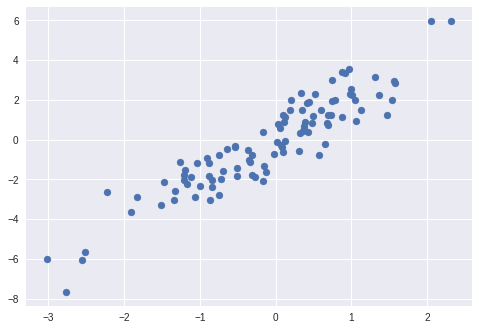

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  

plt.scatter(X[:, 0], X[:, 1]);

In [16]:
# Selecciono 20 de los 100 (X.shape[0] = 100) sin reposición
indices = np.random.choice(X.shape[0], 20, replace=False)
indices # Array de índices

array([31, 54, 61, 56, 85, 47, 49, 17, 16, 28, 29, 96, 59, 44, 80, 71, 39,
       98, 69,  5])

In [17]:
selection = X[indices]  # fancy indexing!!
selection.shape

(20, 2)

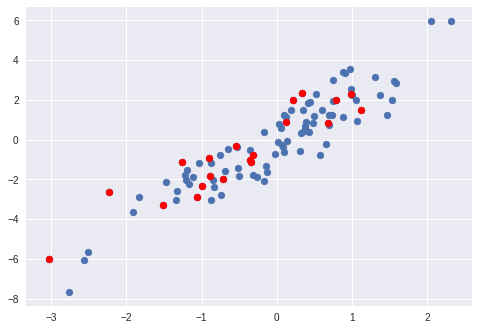

In [23]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='red');
